# Графический метод решения задач линейного программирования

Графический метод очень нагляден, но годится лишь для ограниченного круга "двумерных" задач. Это означает применимость лишь в случае двух переменных: поскольку их можно понимать как точки на плоскости, подобный подход и называют плоским или двумерным.

Зададимся целью реализовать графический метод решения в рамках ООП.

### Подключаем необходимые далее модули

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### Создаем класс, представляющий линейную форму $f(x_1, x_2)$

Значения $x_1$ и $x_2$ являются искомыми для **целевой функции**

$$ F = f(x_1, x_2). $$

В правой части выражения мы наблюдаем так называемую **линейную форму**

$$ f(x_1, x_2) = a \cdot x_1 + b \cdot x_2. $$

При этом одна из переменных $x_i$, $i=1, 2$, может быть очевидным образом выражена через другую.

> Чтобы явно выписать функциональную зависимость, будем обозначать независимую переменную через $x$, а зависимую -- через $y$:
>
> $$ y = c - \displaystyle\frac{a}{b} \, x, $$
>
> где $c = f(x_1, x_2)$ -- значение линейной формы.

Таким образом, примем $a$, $b$ и $c$ как **переменные экземпляра** класса `LinearForm`:

In [ ]:
class LinearForm2D:
  def __init__(self, a, b, c=None, sign=None):
    self.a = a
    self.b = b
    self.c = c
    self.sign = sign
    self.label = ((str(a) if a != 1 else '') + " x_1 " if a != 0 else '') + \
                   ("+" + (str(b) if b != 1 else '') + " x_2 " if b != 0 else '') + \
                      "=" + str(c)
  # Выразить x_2 через x_1:
  def y_func(self, x):
    return (self.c - self.a * x) / self.b if self.b and self.b != 0.0 else None
  # Выразить x_1 через x_2:
  def x_func(self, y):
    return (self.c - self.b * y) / self.a if self.a and self.a != 0.0 else None
  # Вычислить значение линейной формы при данной комбинации x_1 и x_2:
  def f_value(self, x1, x2):
    return self.a*x1 + self.b*x2
  # Подготовить график:
  def prepare_plot(self, s = 0, f = 100, num = 10, color='black'):
    ps = np.linspace(s, f, num)
    xs = self.x_func(ps)
    if(xs is not None):
      plt.plot(xs, ps, label=self.label, color=color)
    else:
      ys = self.y_func(ps)
      if(ys is not None):
        plt.plot(ps, ys, label = self.label, color=color)
    plt.legend()

Для целевой функции вида

$$ F = a \, x_1 + b \, x_2 $$

рассмотрим выражения

\begin{equation*}
  \begin{array}{cc}
    x_2 = F - \displaystyle\frac{a}{b}\,x_1, &
    x_1 = F - \displaystyle\frac{b}{a}\,x_2,
  \end{array}
\end{equation*}

где $F$ выступает как параметр, значение которого задает так называемую **линию формы**.

Иными словами, при данном значении $F$ целевой функции представленные выражения определяют функциональные зависимости, которые можно использовать, например, для отображения на графике: ясно, что графиками таких функций будут прямые.

В нашей реализации эти функциональные зависимости получаются в результате использования функций, соответственно, `y_func` и `x_func`, определенных в классе `LinearForm2D`.

### Конкретный пример

Рассмотрим следующую систему ограничений:

\begin{equation*}
\left\{\begin{array}{@{}l@{}}
    2\,x_1 + 4\,x_2 \leq 10,\\
    x_1 \leq 4, \\
    x_2 \leq 2, \\
    x_1 \geq 0, \quad x_2 \geq 0.
  \end{array}\right.
\end{equation*}

Границы соответствующих плоскостей будут заданы функциями, выражаемыми из следующих линейных форм:


In [ ]:
# Ограничения:
b1 = LinearForm2D(2, 4, 10, '<=')
b2 = LinearForm2D(1, 0, 4, '<=')
b3 = LinearForm2D(0, 1, 2, '<=')
b4 = LinearForm2D(1, 0, 0, '>=')
b5 = LinearForm2D(0, 1, 0, '>=')

Для удобства их можно собрать в единый список:

In [ ]:
b_list = [b1, b2, b3, b4, b5]

Добавим каждый элемент в отображение на плоскости $Ox_1x_2$ и посмотрим, что получается:

In [ ]:
print(list(mcolors.BASE_COLORS.keys()))

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


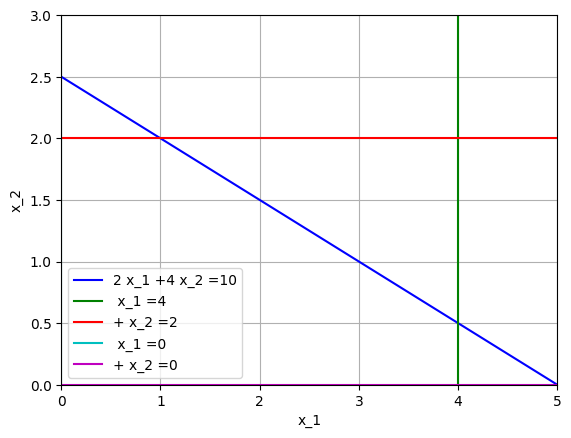

In [ ]:
for b in b_list:
  b.prepare_plot(s = 0, f = 5, color=list(mcolors.BASE_COLORS.keys())[b_list.index(b)])

plt.xlabel("x_1")
plt.ylabel("x_2")

plt.xlim(0, 5)
plt.ylim(0, 3)

plt.grid()
plt.show()

Теперь заштрихуем область, ограниченную прямыми. Чтобы это сделать, введем соответствующие функции, генерирующие неравенства:

In [ ]:
def Ineq(f, x, y):
  if(f.sign == '<='):
    if(f.y_func(x) is not None):
      return y <= f.y_func(x) if f.b > 0 else y >= f.y_func(x)
    else:
      return x <= f.x_func(y) if f.a > 0 else x >= f.x_func(y)
  elif(f.sign == '>='):
    if(f.y_func(x) is not None):
      return y >= f.y_func(x) if f.b > 0 else y <= f.y_func(x)
    else:
      return x >= f.x_func(y) if f.a > 0 else x <= f.x_func(y)
  else:
    return None

print(Ineq(b2, 1, 1))

None
True


Построим область, ограниченную соответствующими неравенствами:

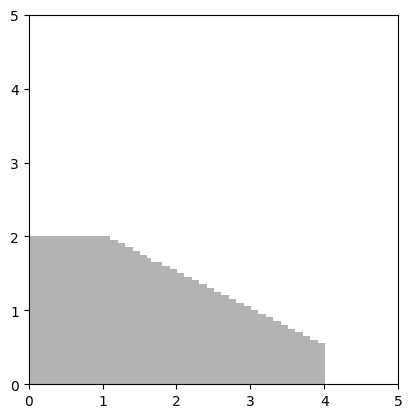

In [ ]:
d = np.linspace(0, 5, 100)
x,y = np.meshgrid(d,d)

plt.imshow(
  (Ineq(b1, x, y) & Ineq(b2, x, y) & Ineq(b3, x, y) & Ineq(b4, x, y) & Ineq(b5, x, y)).astype(int),
  extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Greys", alpha = 0.3);

plt.show()

#### Задача №1

Найти способ отображения границ и области на одном графике

### Поиск оптимального решения

Известно, что оптимальное решение достигается в одной из точек пересечения прямых, ограничивающих область допустимых решений. Чтобы найти эти точки пересечения, необходимо решить системы вида

\begin{equation*}
  \left\{\begin{array}{@{}l@{}}
    a_1\,x_1 + b_1\,x_2 = c_1,\\
    a_2 \, x_1 + b_2 \, x_2 = c_2, \\
  \end{array}\right.
\end{equation*}

где зафиксированы две линейные формы, отвечающие соответственно двум прямым.

In [ ]:
def Point(f1, f2):
  if (f1.a * f2.b - f1.b * f2.a == 0):
    print("The equation has no solution")
  else:
    d = (f1.a * f2.b - f1.b * f2.a)
    x = (f1.c * f2.b - f1.b * f2.c) / d
    y = (f1.a * f2.c - f1.c * f2.a) / d
    return (x, y)

print(Point(b1, b2))

(4.0, 0.5)
